In [2]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Question 13

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

In [3]:
np.random.seed(1)

## Part A

Using the `normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from a $N(0,1)$ distribution. This represents a feature, $X$.

An $N(X,Y)$ distribution is a normal distribution with $\text{mean}=X$ and $\text{std dev}=Y$.

In [4]:
x = np.random.normal(loc=0, scale=1, size=100)

## Part B

Using the `normal()` method, create a vector, `eps`, containing $100$ observations drawn from a $N(0,0.25)$ distribution -- a normal distribution with mean zero and variance $0.25$.

In [5]:
eps = np.random.normal(loc=0, scale=0.25, size=100)

## Part C

Using `x` and `eps`, generate a vector `y` according to the model
$$Y =−1+0.5X+\epsilon.$$
What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [7]:
y = -1 + (0.5 * x) + eps

print(f"The length of vector y is {len(y)}.")
print("The value of beta 0 is 1 and the value of beta_1 is 0.5 in this linear model.")

The length of vector y is 100.
The value of beta 0 is 1 and the value of beta_1 is 0.5 in this linear model.


## Part D

Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

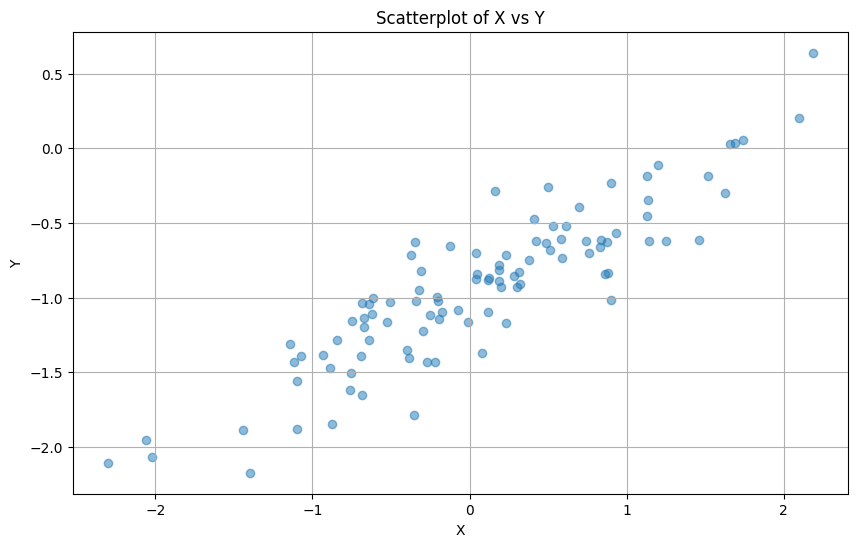

In [36]:
plt.figure(figsize=(10, 6))

plt.scatter(x, y, alpha=0.5)

plt.title('Scatterplot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

There appears to be a linear relationship present between $X$ and $Y$, where $\hat{\beta}_1$ is approximately $0.5$ and $\hat{\beta}_0$ is approximately $-1$.

## Part E

Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?

In [14]:
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           5.39e-36
Time:                        19:39:39   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.0

$\hat{\beta}_0$ is $-0.962$ which is very close to the real value of $\beta_0$ of $-1$. Similarly, $\hat{\beta}_1$ is $-0.523$ which is very close to the real value of $\beta_1$ of $0.5$.

## Part F

Display the elast squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

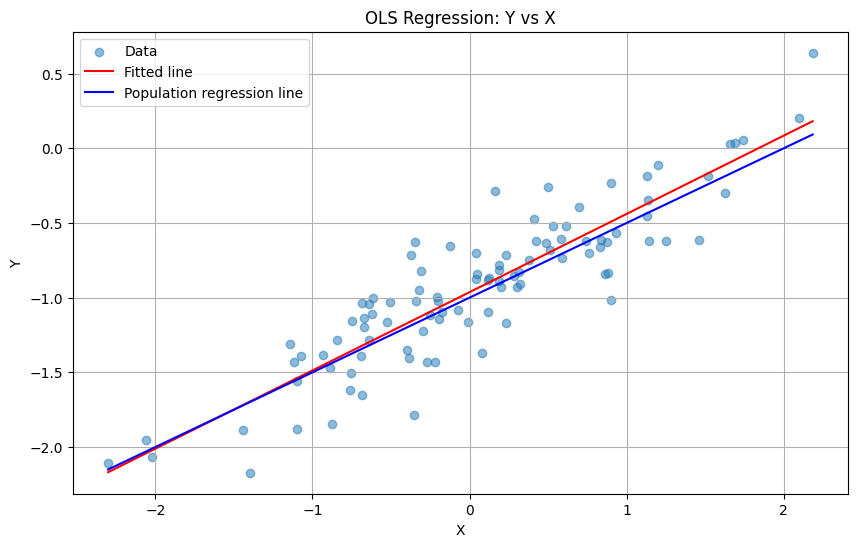

In [31]:
plt.figure(figsize=(10, 6))

# plot sample x, y values
plt.scatter(x, y, alpha=0.5, label='Data')

x_sorted = np.sort(x)
X_sorted = sm.add_constant(x_sorted)
y_actual = -1 + 0.5 * x + eps

# Plot the fitted line
plt.plot(x_sorted, results.predict(X_sorted), color='red', label='Fitted line')

# plot the population line
y_population = -1 + 0.5 * x_sorted 
plt.plot(x_sorted, y_population, color='blue', label='Population regression line')

plt.title('OLS Regression: Y vs X')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

## Part G

Now fit a polynomial regression model that predicts `y` using `x` and `x^2`. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [ ]:
X_QUAD= sm.add_constant(np.column_stack((x, x**2)))

model = sm.OLS(y, X_QUAD)
results = model.fit()

print(results.summary())
